In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#torch version
torch.__version__

'2.1.0+cu118'

###Data (Preparing and Loading)

We'll use linear regression to create the data with known parameters (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using **gradient descent**.

In [ ]:
# Create Known Parameter
weight = 0.7
bias = 0.3

#Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

###Split data into training and test sets

In [ ]:
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data,train_labels, c='b', s=4, label="Training data")

  #Plot test data in green
  plt.scatter(test_data,test_labels, c='g', s=4 , label="Testing data")

  if predictions is not None:
    plt.scatter(test_data,predictions, c='r', s=4, label="Prediction")

  #Show the legend
  plt.legend(prop={"size":14})

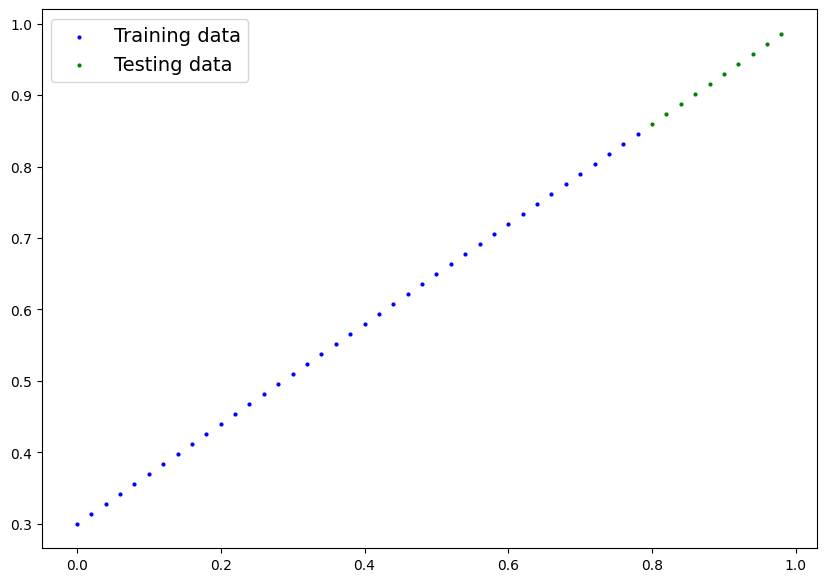

In [ ]:
plot_predictions()

###Build Model

In [ ]:
#Create a Linear Regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, dtype=torch.float),requires_grad=True)#intitializing random weight
    self.bias = nn.Parameter(torch.rand(1, dtype=torch.float),requires_grad=True)#initializing random bias

    #requires_grad=True -> Updates the value with gradient descent

  #Forward defines the computation in the model
  def forward(self, x: torch.Tensor)->torch.Tensor: #"x" is the input data (train/test features)
    return self.weights * x + self.bias #y=mx+c

###PyTorch model building essentials

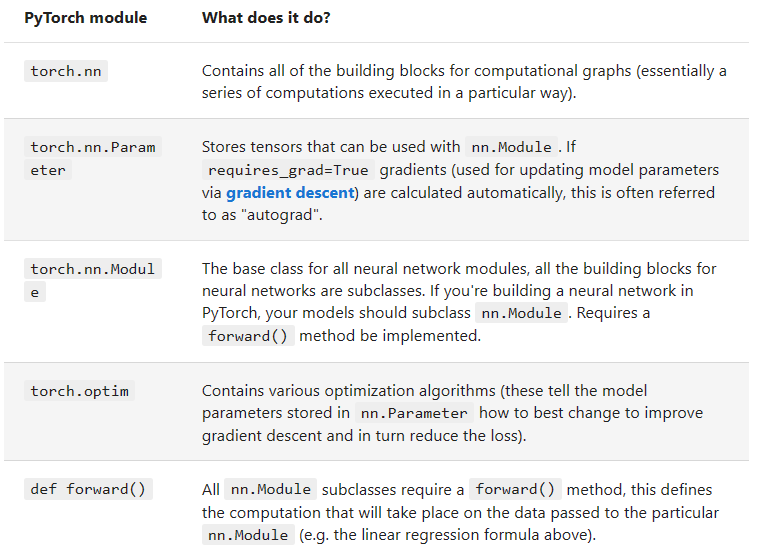

###Checking the contents of a PyTorch model

In [ ]:
#Set manual seed
torch.manual_seed(42)

#Create an instance of the model
model_0 = LinearRegressionModel()

#Checking Parameters
print(list(model_0.parameters()))
#or get the state
model_0.state_dict()

[Parameter containing:
tensor([0.8823], requires_grad=True), Parameter containing:
tensor([0.9150], requires_grad=True)]


OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

In [ ]:
#Check Predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])


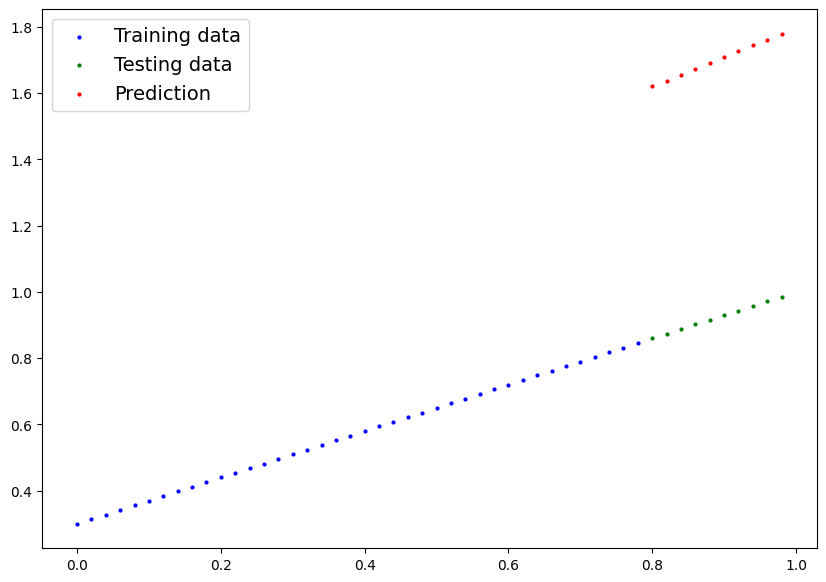

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds

tensor([[-0.7608],
        [-0.7645],
        [-0.7681],
        [-0.7718],
        [-0.7754],
        [-0.7790],
        [-0.7827],
        [-0.7863],
        [-0.7900],
        [-0.7936]])

###Train Model

**Creating a loss function and optimizer in PyTorch**

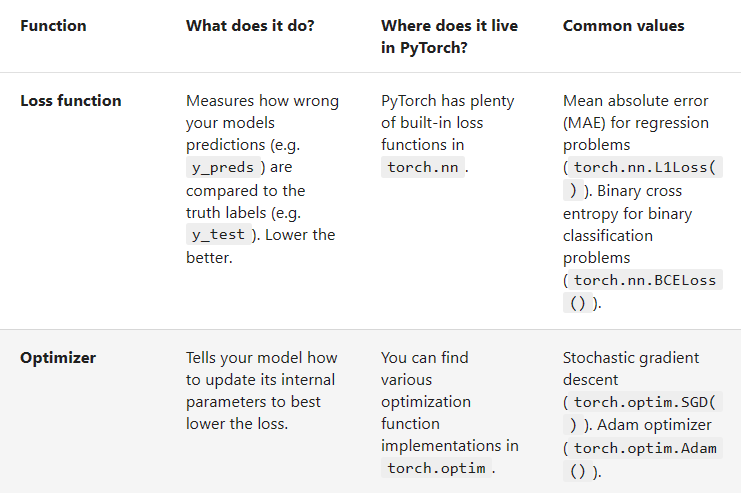

In [ ]:
#Create the loss function
loss_fn = nn.L1Loss() #MAE

#Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01) #SGD

In [ ]:
torch.manual_seed(42)

epochs = 100
#Create empty loss lists to tracks values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  ###Training

  #Put model in training mode
  model_0.train()

  #1. Forward pass on train data using the forward() method inside
  y_pred = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #3. Zero grad of the optimizer
  optimizer.zero_grad()

  #4. Loss backwards
  loss.backward()

  #5. Progress the optimizer
  optimizer.step()

  ###Testing

  # Put the model in evaluation mode
  model_0.eval()

  with torch.inference_mode():
    #1. Forward passs on test data
    test_pred = model_0(X_test)

    #2. Calculate loss on test data
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    #Print out what's happening
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.6860889196395874 | MAE Test Loss: 0.7637526988983154 
Epoch: 10 | MAE Train Loss: 0.5708791017532349 | MAE Test Loss: 0.6290428042411804 
Epoch: 20 | MAE Train Loss: 0.45566922426223755 | MAE Test Loss: 0.4943329691886902 
Epoch: 30 | MAE Train Loss: 0.34045934677124023 | MAE Test Loss: 0.35962313413619995 
Epoch: 40 | MAE Train Loss: 0.2252494841814041 | MAE Test Loss: 0.2249133139848709 
Epoch: 50 | MAE Train Loss: 0.1100396141409874 | MAE Test Loss: 0.09020347893238068 
Epoch: 60 | MAE Train Loss: 0.009724985808134079 | MAE Test Loss: 0.020998019725084305 
Epoch: 70 | MAE Train Loss: 0.006216754671186209 | MAE Test Loss: 0.014099234715104103 
Epoch: 80 | MAE Train Loss: 0.002788322512060404 | MAE Test Loss: 0.005826681852340698 
Epoch: 90 | MAE Train Loss: 0.007095950655639172 | MAE Test Loss: 0.00754010071977973 


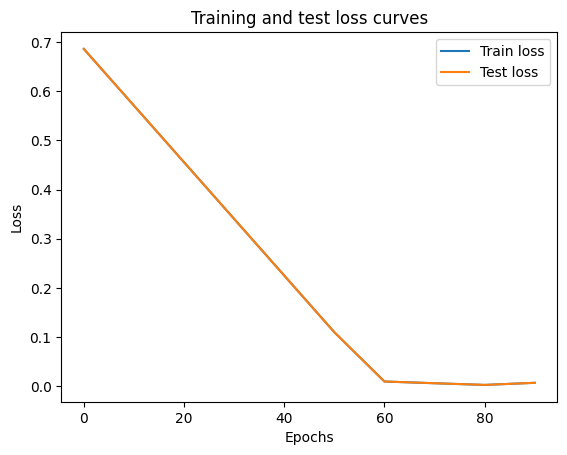

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])


###Making predictions with a trained PyTorch Model

In [ ]:
#1. Set the model in evaluation mode
model_0.eval()

#2. Setup the inference mode
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

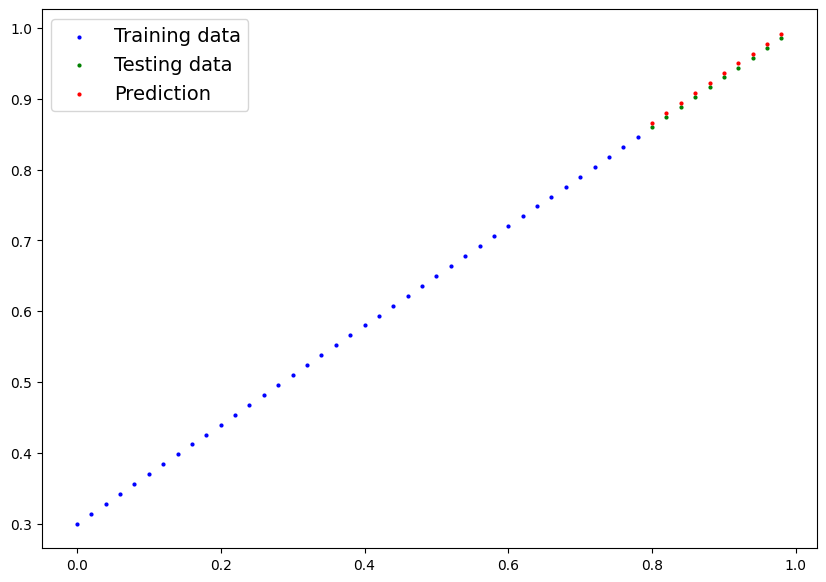

In [ ]:
plot_predictions(predictions=y_preds)

###Saving and loading a PyTorch model

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [ ]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

--Shaahid Ahmed N

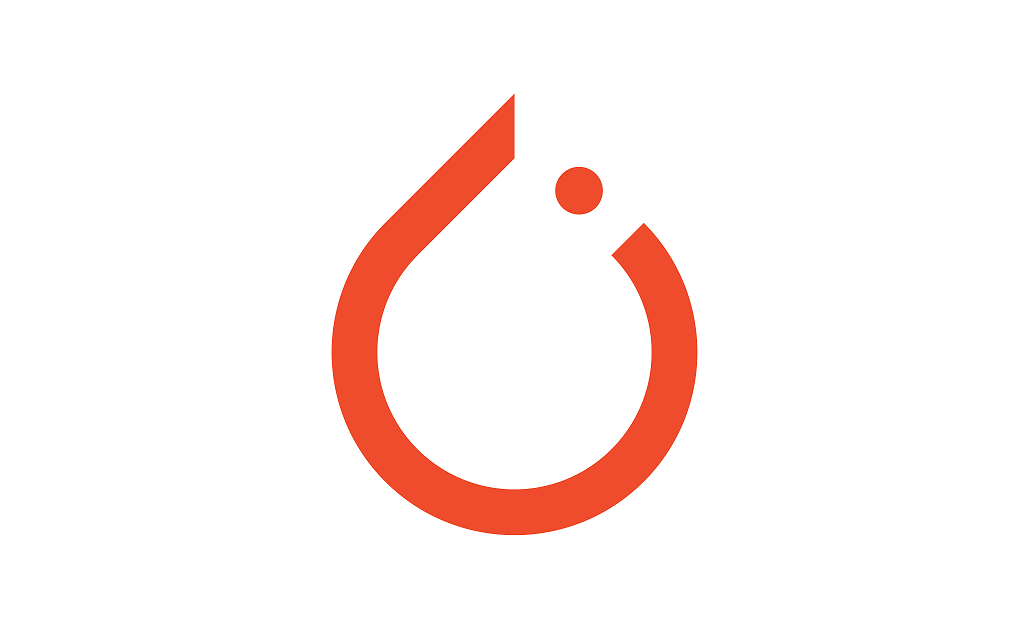